# Pandas 익히기

이 절에서는 Pandas의 여러가지 기능을 사용하는 방법을 익히는 것을 목표로 한다.

Pandas 참고자료 
 1. EBS 이솦
 
Seaborn 참고자료
 1. https://jjeongil.tistory.com/775
 2. https://chancoding.tistory.com/12
 3. https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
 4. https://tariat.tistory.com/744
 5. https://seaborn.pydata.org/generated/seaborn.regplot.html

데이터 원본 
 1. https://www.kaggle.com/c/titanic
 2. https://www.kaggle.com/karangadiya/fifa19?select=data.csv

## FIFA2019 데이터로 Pandas 기본 익히기

- a=pd.read_csv
- a.loc, a.iloc

In [2]:
import pandas as pd

fifa2019 = pd.read_csv('Fifa_data/data.csv') #pandas로 데이터 부르기

print(fifa2019.shape) #데이터 크기 
print(fifa2019.info()) #항목 리스트

(18207, 89)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  

In [3]:
sub1 = fifa2019.loc[14] #14행의 데이터를 가져옴
print(sub1)

Unnamed: 0                                                    14
ID                                                        215914
Name                                                    N. Kanté
Age                                                           27
Photo             https://cdn.sofifa.org/players/4/19/215914.png
                                       ...                      
GKHandling                                                    12
GKKicking                                                     10
GKPositioning                                                  7
GKReflexes                                                    10
Release Clause                                           €121.3M
Name: 14, Length: 89, dtype: object


In [4]:
sub2 = fifa2019.loc[2:16] #2행부터 16행까지의 행의 값을 sub2에 저장
print(sub2)

    Unnamed: 0      ID            Name  Age  \
2            2  190871       Neymar Jr   26   
3            3  193080          De Gea   27   
4            4  192985    K. De Bruyne   27   
5            5  183277       E. Hazard   27   
6            6  177003       L. Modrić   32   
7            7  176580       L. Suárez   31   
8            8  155862    Sergio Ramos   32   
9            9  200389        J. Oblak   25   
10          10  188545  R. Lewandowski   29   
11          11  182521        T. Kroos   28   
12          12  182493        D. Godín   32   
13          13  168542     David Silva   32   
14          14  215914        N. Kanté   27   
15          15  211110       P. Dybala   24   
16          16  202126         H. Kane   24   

                                             Photo Nationality  \
2   https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4   https://cdn.sofifa.org/players/4/19/192985.pn

In [6]:
sub3 = fifa2019.loc[1:16,['Name','Preferred Foot']] #1행부터 16행까지 이름과 선호하는 발을 보여준다.
print(sub3)

#cf. loc와 iloc의 차이: loc은 인덱스 레이블을 기준으로 행 데이터를 읽음. 반면 iloc은 행 번호를 기준으로 행 데이터를 읽음. 

                 Name Preferred Foot
1   Cristiano Ronaldo          Right
2           Neymar Jr          Right
3              De Gea          Right
4        K. De Bruyne          Right
5           E. Hazard          Right
6           L. Modrić          Right
7           L. Suárez          Right
8        Sergio Ramos          Right
9            J. Oblak          Right
10     R. Lewandowski          Right
11           T. Kroos          Right
12           D. Godín          Right
13        David Silva           Left
14           N. Kanté          Right
15          P. Dybala           Left
16            H. Kane          Right


In [13]:
korea_player = fifa2019['Nationality'] == 'Korea Republic' #국적이 한국인 열을 해당 명령어로 지정
sub5 = fifa2019.loc[korea_player]
print(sub5) #한국인 리스트

       Unnamed: 0      ID             Name  Age  \
125           125  200104           H. Son   25   
1295         1295  180283    Ki Sung Yueng   29   
1407         1407  182152     Koo Ja Cheol   29   
2002         2002  211927  Kwon Chang Hoon   24   
2021         2021  221671     Lee Jae Sung   25   
...           ...     ...              ...  ...   
17955       17955  240272   Min Gyeong Min   22   
17959       17959  245401     Lee Dong Hee   21   
17965       17965  243359     Kim Jong Jin   19   
18058       18058  244108  Hong Hyeon Seok   19   
18084       18084  244411      Kwon Ki Pyo   21   

                                                Photo     Nationality  \
125    https://cdn.sofifa.org/players/4/19/200104.png  Korea Republic   
1295   https://cdn.sofifa.org/players/4/19/180283.png  Korea Republic   
1407   https://cdn.sofifa.org/players/4/19/182152.png  Korea Republic   
2002   https://cdn.sofifa.org/players/4/19/211927.png  Korea Republic   
2021   https://cdn.sof

In [36]:
sub6 = sub5[['Name','Release Clause']]  #한국인 데이터에서 이름과 이적료만 따로 저장
sub6.iloc[0:15]  #한국인 데이터에서 1위부터 16위까지 리스트를 함. 

,Name,Release Clause
125,H. Son,€71.2M
1295,Ki Sung Yueng,€14.3M
1407,Koo Ja Cheol,€12.8M
2002,Kwon Chang Hoon,€17.6M
2021,Lee Jae Sung,€13.8M
2217,Suk Hyun Jun,€13.5M
2516,Cho Hyun Woo,€6.2M
3094,Kim Seung Joon,€6.5M
3101,Shin Hwa Yong,€1.2M
3297,Lee Chang Min,€5.4M


# Seaborn 익히기

이 절에서는 효과적인 데이터 시각화를 도와주는 seaborn을 학습한다.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

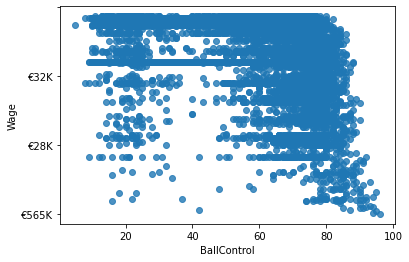

In [56]:
# 가로: 볼 컨트롤률, 세로: 이적료

#plt.yticks([]) #ytick을 없애버림 https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yticks.html
plt.yticks(np.arange(0, 200, step=50))
sns.regplot(x="BallControl", y="Wage", data=fifa2019, fit_reg=False)

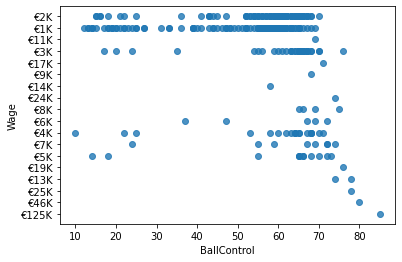

In [53]:
sns.regplot(x="BallControl", y="Wage", data=sub5, fit_reg=False)  #한국인중에서 구분